<a href="https://colab.research.google.com/github/dayogh/portfolio/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing the Libraries
import pandas as pd ## pandas is used to manupulate the dataframe
import numpy as np ## numpy is used to do scientific calculations
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns ## seaborn used for visualization 
import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


tilda ~ creates a temporary directory







In [ ]:
! mkdir ~/.kaggle

escape slash \ to handle space in directory path

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/Github/Kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json


read/write permission for user only

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Download the data from Kaggle

In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 76.1MB/s]


In [ ]:
! unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.shape

(1460, 81)

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.info() ## getting the information from the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.duplicated().sum()


0

There's no duplicate data

In [ ]:
## Analysing if there is any null values

pd.options.display.max_rows=None ## shows all the rows
data.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

We have null values in the dataset


There are 19 columns with null values

In [ ]:
#pd.reset_option('max_columns')
pd.reset_option('max_rows')

# Handling the missing values and Feature selection

Handling missing values for LotFrontage


In [ ]:
data.LotFrontage.value_counts()


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

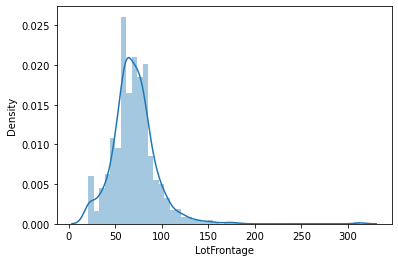

In [ ]:
## distribution plot for LotFrontage
 
sns.distplot(data.LotFrontage)
plt.show()

In [ ]:
lot_frontage_mean = data['LotFrontage'].mean()  ## getting the mean
lot_frontage_mean

70.04995836802665

In [ ]:
## Checking the percentage of missing values for LotFrontage

print('The Percentage of data missing in LotFrontage is ',data.LotFrontage.isnull().sum()/len(data)*100)

The Percentage of data missing in LotFrontage is  17.73972602739726


In [ ]:
data.loc[data['LotFrontage'].isnull()==True]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [ ]:
## Replacing the nan values with mean for LotFrontage

data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=lot_frontage_mean

Handling the missing values for Alley,PoolQC,Fence,MiscFeature¶


In [ ]:
## Percentage of missing values in Alley,PoolQC,Fence,MiscFeature
 
d1=data[['Alley','PoolQC','Fence','MiscFeature']]
a=d1.isnull().sum()/len(d1)*100
a


Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

More than 50% of the data are missing in Alley,PoolQC,Fence,MiscFeature


In [ ]:
## removing the features

data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

Handling the missing values for BsmtQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2

In [ ]:
## Percentage of missing values

d2=data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
b=d2.isnull().sum()/len(d2)*100
b

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
dtype: float64

In [ ]:
## Replacing the missing values with 'NA'

data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')

Replacing missing values for MasVnrType

In [ ]:
data.MasVnrType.value_counts()


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
## Replacing the missing values with mode

data.loc[data['MasVnrType'].isnull()==True,'MasVnrType']='None'


 Replacing missing values for MasVnrArea


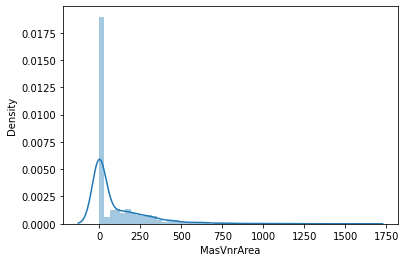

In [ ]:
 sns.distplot(data.MasVnrArea)


In [ ]:
## Finding the median

data['MasVnrArea'].median()


0.0

In [ ]:
## Replacing the missing value by median
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=data['MasVnrArea'].median()


Handling missing values for GarageType,GarageFinish,GarageQual,GarageCond


In [ ]:
## Percentage of missing values
d3=data[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]]
c=d3.isnull().sum()/len(d3)*100
c


GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [ ]:
## Replacing the missing values for GarageType,GarageFinish,GarageQual,GarageCond  by NA

data['GarageType']=data['GarageType'].fillna('NA')
data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageCond']=data['GarageCond'].fillna('NA')

Handling the missing value for GarageYrBlt


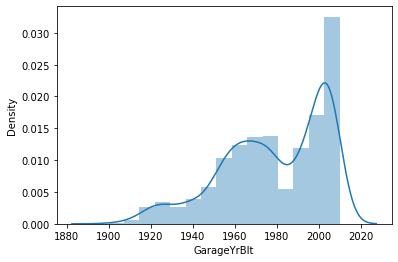

In [ ]:
sns.distplot(data.GarageYrBlt)


In [ ]:
data.GarageYrBlt.median()


1980.0

In [ ]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']= data['GarageYrBlt'].median()


Handling the missing value for Electrical


In [ ]:
data.Electrical.value_counts()


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
## Replacing the null values with mode
data.loc[data['Electrical'].isnull()==True,'Electrical']='SBrkr'


Handling the missing values for FireplaceQu

In [ ]:
data.FireplaceQu.value_counts()


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
## Replacing the missing values with NA
data.loc[data['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

In [ ]:
data.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

There is no null values now.We have cleared all the null values.


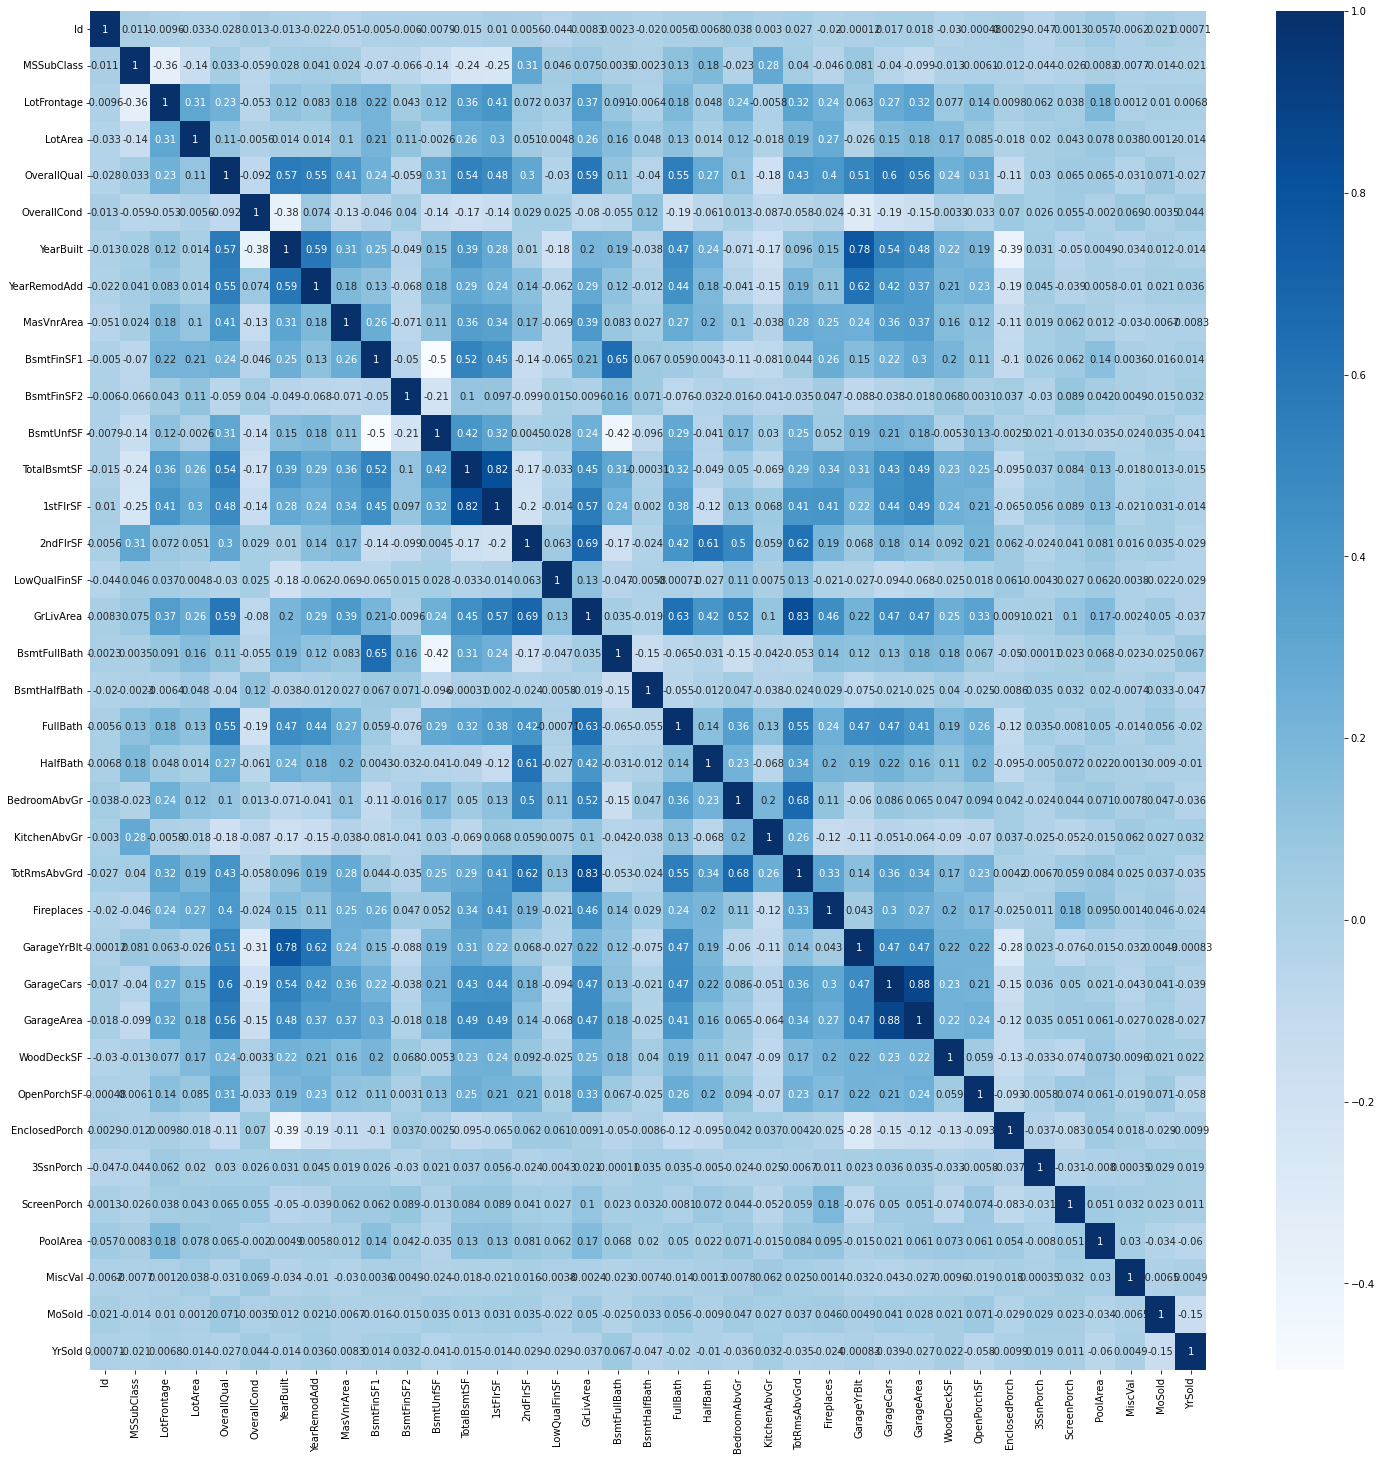

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data.drop('SalePrice',axis=1).corr(),cmap='Blues',annot=True)
plt.show()


# Exploratory Data Analysis

Univarient Analysis


In [ ]:
## Getting the features with object datatype
dtype_objects = list(columns for columns in data.select_dtypes([object]).columns)

In [ ]:
dtype_objects


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
len(dtype_objects)


39

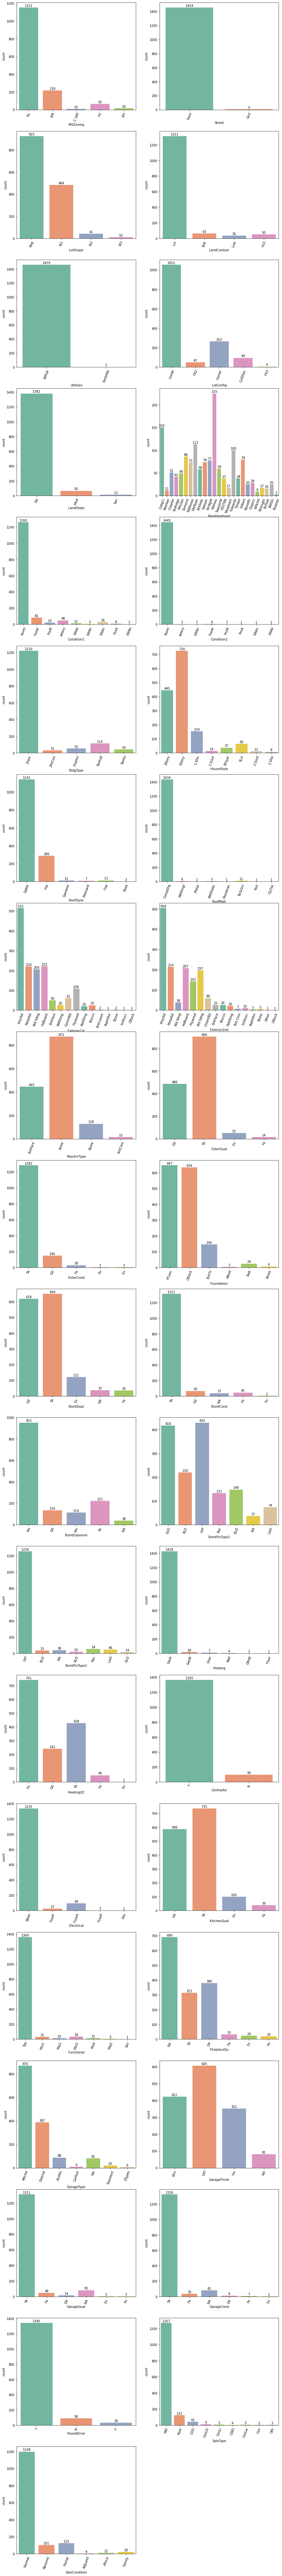

In [ ]:
## countplot for datatype with objects

plt.figure(figsize=(15,150))
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    b= sns.countplot(x=data[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

Count plot for the datatype object has been plotted

In [ ]:
## Getting the features with float datatype

dtype_float =list(columns for columns in data.select_dtypes([float]).columns)


In [ ]:
dtype_float


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

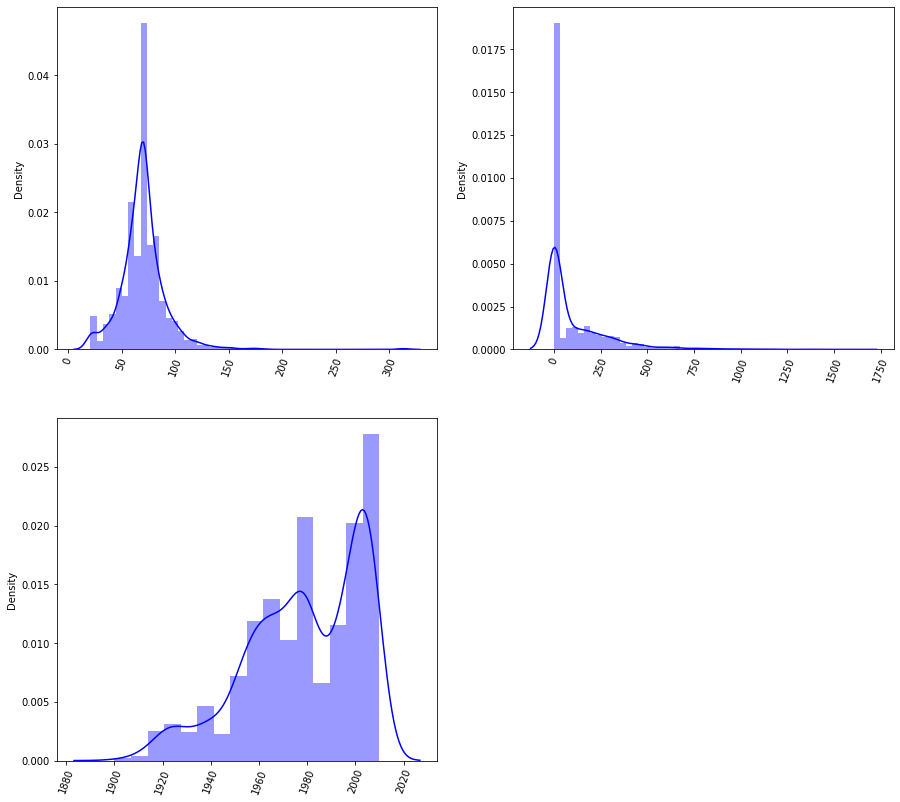

In [ ]:
## Distribution plot 

plt.figure(figsize=(15,150))
plotnumber=1
for a in dtype_float:
    ax=plt.subplot(20,2,plotnumber)
    sns.distplot(x=data[a],color='blue')
    plt.xticks(rotation=70)
    plotnumber+=1
plt.show() 


From the graph LotFrontage gives normal distribution but MasVnrArea and GarageYrBlt is skewed

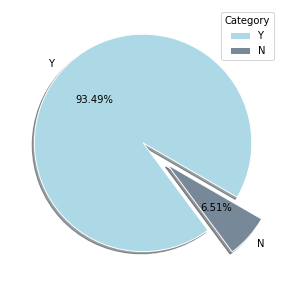

In [ ]:
## Pie plot for CentralAir

plt.figure(figsize=(5,5))
labels=['Y','N']
size=data['CentralAir'].value_counts()
colors=['lightblue','lightslategray']
explode=[0,0.3]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow = True,startangle = -30,
wedgeprops= {'edgecolor':'white','linewidth':1})
plt.legend(labels,loc="upper right",title='Category') ## used to label at the side
plt.show()

From the graph 93.49% houses has CentralAir and 6.51% houses has no CentralAir¶


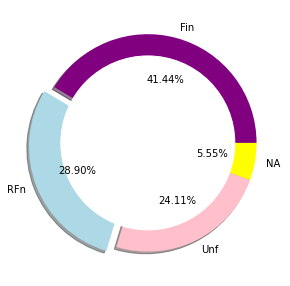

In [ ]:
## Donut chart for GarageFinish

plt.figure(figsize=(5,5))
labels=['Fin','RFn','Unf','NA']
size=data['GarageFinish'].value_counts()
colors=['purple','lightblue','pink','yellow']
explode=[0,0.1,0,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
circle = plt.Circle( (0,0),0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()


From the graph for 41.44% of the houses the interior finish of the garage is finished.


# Bivarient and Multivarient Analysis


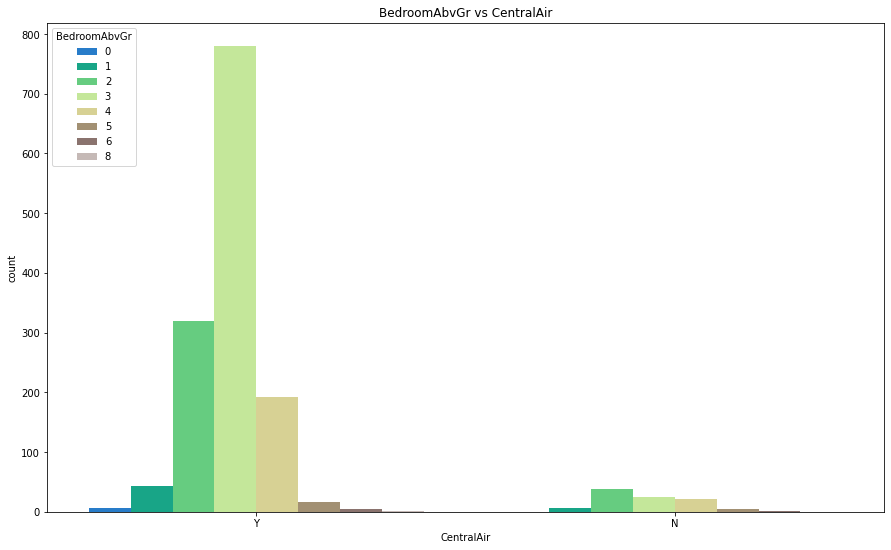

In [ ]:
## Countplot for CentralAir and BedroomAbvGr

plt.figure(figsize=(15,9))
sns.countplot(x='CentralAir',hue='BedroomAbvGr',palette='terrain',data=data).set(title="BedroomAbvGr vs CentralAir")
plt.show()

The houses with 3 bedrooms has more central air conditioning than others.


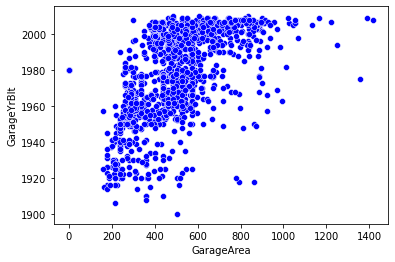

In [ ]:
## Scatter plot for GarageArea and GarageYrBlt

sns.scatterplot(x='GarageArea',y='GarageYrBlt',data=data,color='blue')
plt.show()

We can see there are some outliers present while comparing garage area and garage year built



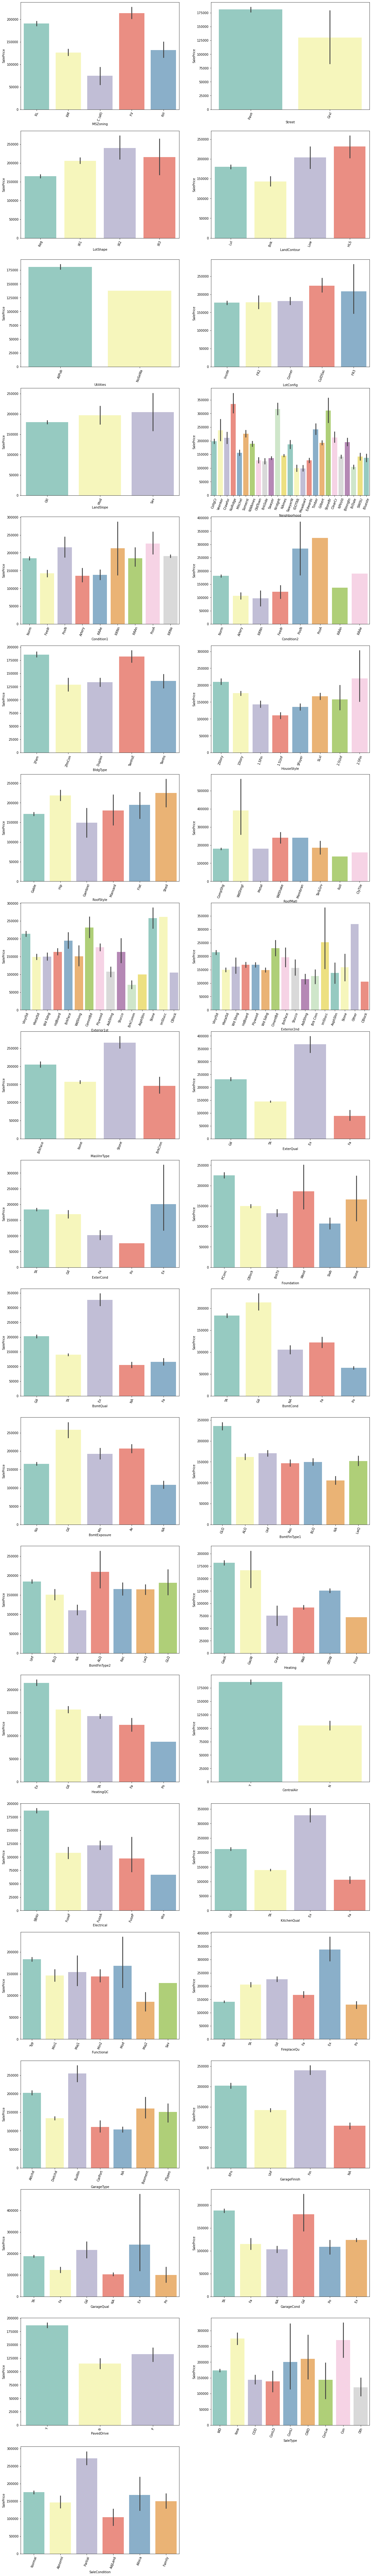

In [ ]:
## barplot for saleprice and the data type with objects

plt.figure(figsize=(20,150),facecolor='white')
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    sns.barplot(x=data[c],y=data.SalePrice,palette='Set3')
    plotnumber+=1
    plt.xticks(rotation=70)
plt.show() 

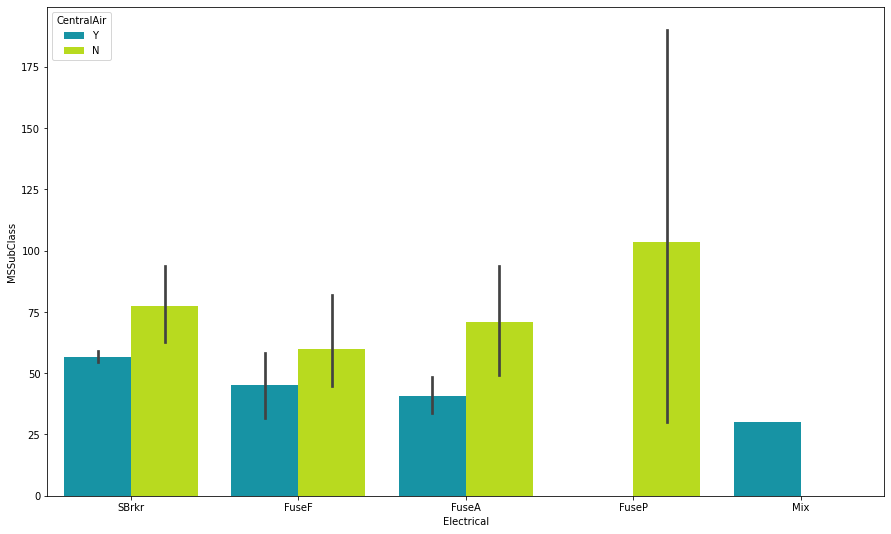

In [ ]:
## bar plot for Electrical,MSSubClass,CentralAir

plt.figure(figsize=(15,9))
splot=sns.barplot(x='Electrical',y='MSSubClass',hue='CentralAir',palette='nipy_spectral',data=data)
plt.show()

Building with 2-STORY 1946 & NEWER and Standard Circuit Breakers & Romex use more central air conditioning than others.

In [ ]:
## Getting the continuous data features

box=data[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

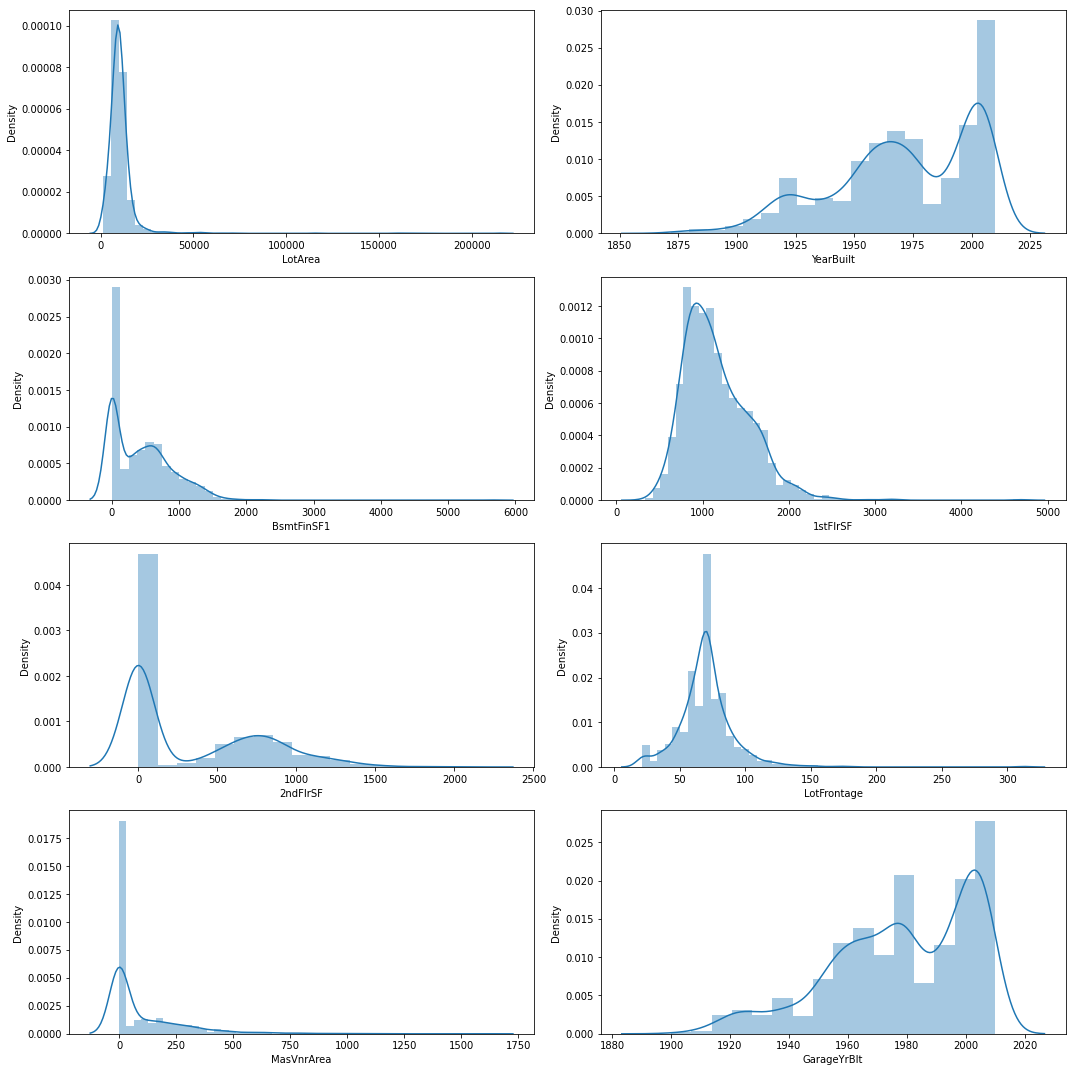

In [ ]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for c in box:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(box[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()   

# Finding the outliers


In [ ]:
## getting the continuous data features

box=data[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

In [ ]:
box


,LotArea,YearBuilt,BsmtFinSF1,1stFlrSF,2ndFlrSF,LotFrontage,MasVnrArea,GarageYrBlt
0,8450,2003,706,856,854,65.0,196.0,2003.0
1,9600,1976,978,1262,0,80.0,0.0,1976.0
2,11250,2001,486,920,866,68.0,162.0,2001.0
3,9550,1915,216,961,756,60.0,0.0,1998.0
4,14260,2000,655,1145,1053,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...
1455,7917,1999,0,953,694,62.0,0.0,1999.0
1456,13175,1978,790,2073,0,85.0,119.0,1978.0
1457,9042,1941,275,1188,1152,66.0,0.0,1941.0
1458,9717,1950,49,1078,0,68.0,0.0,1950.0


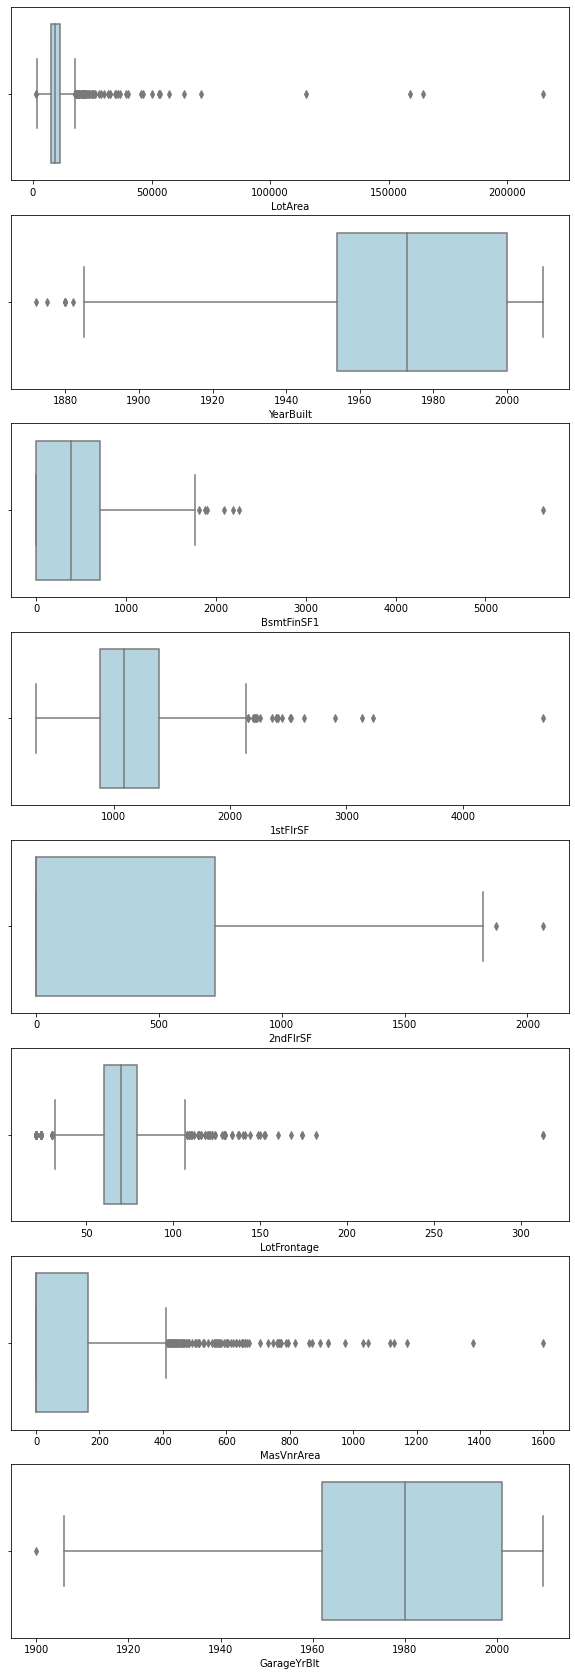

In [ ]:
## boxplot to find the outliers

plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1
for c in box:
    ax=plt.subplot(8,1,plotnumber)
    sns.boxplot(box[c],color='lightblue')
    plotnumber=plotnumber + 1 
plt.show()

# Handling the skewness



In [ ]:
from scipy.stats import skew

numerical_features = data.dtypes[data.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_features})

# checking the head of skewness dataset
skewness

,skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [ ]:
##applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lamda = 0.15
for features in skewed_features:
    data[features] += 1
    data[features] = boxcox1p(data[features], lamda)
data[skewed_features] = np.log1p(data[skewed_features])
print('Skewness has been Handled using Box Cox Transformation')


There are 38 skewed numerical features to box cox transform
Skewness has been Handled using Box Cox Transformation


Changing categorical data to numerical data


In [ ]:
#getting all the categorical feature

data_object = data.select_dtypes(include = "object").columns # or data.select_dtypes([object]).columns
print (data_object)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
#Label Encoding to convert categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for features in data_object:
    data[features] = le.fit_transform(data[features].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

# Feature Scaling

In [ ]:
## Scaling the features
## Spliting the variables

x=data.drop(['Id','SalePrice'],axis=1) ## all the features
y=data['SalePrice']  ## target variable

In [ ]:
#using minmax scaler to scale all the datas

from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)

# Model Creation

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.20,random_state=0)

print("Traning Shape = ",x_train.shape)  ## number of rows and columns  given for training
print('Testing Shape = ',x_test.shape)  ## number of row and columns given for testing


Traning Shape =  (1168, 75)
Testing Shape =  (292, 75)


# Models

Linear Regression

In [ ]:
## importing the library

from sklearn.linear_model import LinearRegression

In [ ]:
LR=LinearRegression()
LR.fit(x_train,y_train)  ## fitting the training data

x_test_pred_LR=LR.predict(x_test)  ## predicted x test

In [ ]:
x_test_pred_LR


array([3.56897729, 3.55147009, 3.48312643, 3.59309126, 3.44246675,
       3.4395375 , 3.62147337, 3.5107301 , 3.73887532, 3.54417625,
       3.57147215, 3.44675173, 3.60910718, 3.4853312 , 3.50523755,
       3.51417732, 3.60812319, 3.48944618, 3.51240884, 3.54150694,
       3.50677558, 3.52992139, 3.44384691, 3.53643722, 3.57754647,
       3.57146691, 3.54539732, 3.41824438, 3.67620005, 3.4739975 ,
       3.51732157, 3.60075491, 3.52803101, 3.64214554, 3.65747699,
       3.58138879, 3.64814584, 3.48999149, 3.59972731, 3.66067593,
       3.60824643, 3.49983475, 3.58565796, 3.6496898 , 3.66924522,
       3.52069   , 3.38025455, 3.49069767, 3.56092793, 3.44788378,
       3.69727569, 3.52727336, 3.55006323, 3.42143853, 3.61955865,
       3.46587021, 3.49081849, 3.60180958, 3.51594637, 3.4555916 ,
       3.5158921 , 3.49815386, 3.511001  , 3.53667461, 3.59483592,
       3.54515094, 3.50901032, 3.58613971, 3.49589468, 3.58975701,
       3.57998047, 3.53641413, 3.39194252, 3.61742415, 3.42772

In [ ]:
y_test ## tested y


529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [ ]:
x_train_pred_LR=LR.predict(x_train) ##predicted x train

x_train_pred_LR

array([3.66490903, 3.45100292, 3.51392301, ..., 3.51449707, 3.57409929,
       3.58299795])

In [ ]:
y_train  ## trained y


618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

In [ ]:
print('Linear Regression training score is',LR.score(x_train,y_train))


Linear Regression training score is 0.9112461595631738


In [ ]:
print('Linear Regression testing score is',LR.score(x_test,y_test))


Linear Regression testing score is 0.8048947007490994


# Evaluation Metrics for Linear Regression


In [ ]:
from sklearn.metrics import r2_score
train_score=r2_score(y_train,x_train_pred_LR)
print('Linear Regression r2_score for training is',train_score)

Linear Regression r2_score for training is 0.9112461595631738


In [ ]:
test_score=r2_score(y_test,x_test_pred_LR)
print('Linear Regression r2_score for testing is',test_score)

Linear Regression r2_score for testing is 0.8048947007490994


Training score is more than testing score so the model is underfitting.¶


# Random Forest Regressor

In [ ]:
## Importing the library

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train) ## fitting the data

x_test_pred_RF=RF.predict(x_test)  ## predicted x test


In [ ]:
x_test_pred_RF


array([3.57631144, 3.51746168, 3.4761043 , 3.60150639, 3.44719347,
       3.46349795, 3.62046179, 3.49912957, 3.72176925, 3.53748078,
       3.57714968, 3.52312613, 3.60168472, 3.49141566, 3.49699949,
       3.52459749, 3.60429314, 3.48600187, 3.52035683, 3.56875021,
       3.50393692, 3.52197721, 3.47661655, 3.55013168, 3.56443606,
       3.58377347, 3.55327357, 3.43471307, 3.6596228 , 3.4892926 ,
       3.51388941, 3.57947299, 3.51992697, 3.64717094, 3.6673988 ,
       3.56215867, 3.6366791 , 3.50072076, 3.60899085, 3.65528675,
       3.58001083, 3.50877724, 3.56461771, 3.65606256, 3.66065621,
       3.52400346, 3.50389029, 3.50261457, 3.55011596, 3.46450516,
       3.69204015, 3.52413924, 3.55499986, 3.43509835, 3.61708376,
       3.48010464, 3.50168773, 3.61432691, 3.5197896 , 3.47005429,
       3.5219129 , 3.50678006, 3.5270832 , 3.53644669, 3.57269962,
       3.53344548, 3.4926505 , 3.59237405, 3.50076518, 3.56948909,
       3.56193775, 3.48527147, 3.43000246, 3.59980493, 3.43808

In [ ]:
y_test   ## y test


529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [ ]:
x_train_pred_RF=LR.predict(x_train)  ## predicted x train
x_train_pred_RF



array([3.66490903, 3.45100292, 3.51392301, ..., 3.51449707, 3.57409929,
       3.58299795])

In [ ]:
y_train  ## y train


618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

Random Forest Regressor Score


In [ ]:
print('Training score for Random Forest Regressor is',RF.score(x_train,y_train))


Training score for Random Forest Regressor is 0.9819299770169406


In [ ]:
print('Testing score for Random Forest Regressor is',RF.score(x_test,y_test))


Testing score for Random Forest Regressor is 0.8790986803519298


Testing score for Random Forest Regressor is 0.8734354150958835

Training score is more than Testing score,so the Random Forest Regressor model is underfitting.So we can do hyper parametric tuning.

# Hyper parametric Tuning -- Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [100,200,300,400,500,600],  ## no. of trees
               'max_features': ['auto', 'sqrt'],  
               'max_depth': [10, 15,20,25], ## maxinum number of levels in trees 
               'min_samples_split':  [2, 5, 10], ## minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4], ## Minimum number of samples required at each leaf node
               'bootstrap': [True, False]}  ##  Method of selecting samples for training each tree


In [ ]:
hyper_tuning=RandomizedSearchCV(estimator=RF,param_distributions=random_grid,n_iter=10,cv=5,verbose=5,random_state=2)

In [ ]:
hyper_tuning.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.910 total time=   1.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.827 total time=   1.3s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.851 total time=   1.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.880 total time=   1.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.879 total time=   1.2s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.913 total time=   0.6s
[CV 2/5] END boo

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=2, verbose=5)

In [ ]:
hyper_tuning.best_params_  ## getting the best parameters


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [ ]:
RF_hyper_tuning=RandomForestRegressor(n_estimators=600,min_samples_split=2,min_samples_leaf= 1,max_features='sqrt',max_depth=30,bootstrap= False)  ## implementing the best parameters


In [ ]:
RF_hyper_tuning.fit(x_train,y_train)


RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=600)

In [ ]:
RF_hyper_pred_test=RF_hyper_tuning.predict(x_test) ## predicted hyperparametric tuning x test

RF_hyper_pred_test


array([3.59604767, 3.51830311, 3.48797586, 3.58479524, 3.4481537 ,
       3.47569177, 3.61882714, 3.50303503, 3.73268961, 3.53721635,
       3.58028362, 3.52662565, 3.60219063, 3.50269459, 3.49758392,
       3.52165013, 3.60053518, 3.46987058, 3.51849079, 3.54265169,
       3.50366372, 3.52704787, 3.48269003, 3.55099494, 3.57511117,
       3.58101742, 3.55616408, 3.42549599, 3.66412332, 3.4842972 ,
       3.51558968, 3.58273785, 3.52056184, 3.64479066, 3.6594941 ,
       3.56658232, 3.63353794, 3.50082487, 3.60829386, 3.6524898 ,
       3.58724088, 3.50993226, 3.5634541 , 3.6546816 , 3.66608714,
       3.51900072, 3.50202666, 3.50484822, 3.54696475, 3.47389901,
       3.68087474, 3.5260345 , 3.55321552, 3.43133213, 3.60823571,
       3.4834085 , 3.49898068, 3.60872847, 3.51619179, 3.47130843,
       3.52511351, 3.50994393, 3.52518095, 3.53960088, 3.59009699,
       3.5345146 , 3.50141583, 3.59378852, 3.50924348, 3.5779557 ,
       3.56445375, 3.49378249, 3.44463104, 3.59957956, 3.44913

In [ ]:
RF_hyper_pred_train=RF_hyper_tuning.predict(x_train)  ## predicted hyper parametric tuning x train

RF_hyper_pred_train


array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

Score after Random Forest Regressor Hyper Parametric Tuning

In [ ]:
print('Training score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_train,y_train))


Training score for Random Forest Regressor Hyper Parametric Tuning is  0.9999999999716636


In [ ]:
print('Testing score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_test,y_test))

Testing score for Random Forest Regressor Hyper Parametric Tuning is  0.884143477303353


# Decision Tree Regressor

In [ ]:
## Importing the library

from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)


DecisionTreeRegressor()

In [ ]:
x_test_pred_DT=DT.predict(x_test) ## predicted x test

x_test_pred_DT  ## predicted x test

array([3.49808923, 3.52582687, 3.49666629, 3.57975365, 3.43140396,
       3.47213013, 3.60354464, 3.51287759, 3.72186494, 3.5670929 ,
       3.56519099, 3.52552538, 3.5933268 , 3.51104818, 3.50159571,
       3.49950045, 3.62700884, 3.44829819, 3.52552538, 3.62866039,
       3.51494465, 3.52062772, 3.46368347, 3.56132211, 3.56132211,
       3.66168819, 3.55935415, 3.34357704, 3.67190816, 3.45929932,
       3.49950045, 3.57674289, 3.5142498 , 3.64583408, 3.63855422,
       3.56294325, 3.69894401, 3.5063872 , 3.61027367, 3.68762393,
       3.57175657, 3.49666629, 3.57754507, 3.66168819, 3.62249652,
       3.47295241, 3.5063872 , 3.5063872 , 3.56803594, 3.47620275,
       3.71618574, 3.54273314, 3.56317081, 3.41839824, 3.60731598,
       3.47700581, 3.48018103, 3.60354464, 3.49950045, 3.43140396,
       3.52969854, 3.51558551, 3.5230941 , 3.55433226, 3.57449452,
       3.55020524, 3.52062772, 3.60421072, 3.52370518, 3.56614461,
       3.56326756, 3.47377078, 3.40310984, 3.55736315, 3.42824

In [ ]:
y_test ## y test

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [ ]:
x_train_pred_DT=DT.predict(x_train)  ## predicted x train

x_train_pred_DT


array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

In [ ]:
y_train ## y train


618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

In [ ]:
print('Training score for Decision Tree Regressor is',DT.score(x_train,y_train))


Training score for Decision Tree Regressor is 1.0


In [ ]:
print('Testing score for Decision Tree Regressor is',DT.score(x_test,y_test))


Testing score for Decision Tree Regressor is 0.7227513567175401


Training score is more than the Testing score,so the decision tree model is underfitting,So we can do hyper parametric tuning.

Hyper parametric Tuning-- Decision Tree



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [2,4,6,8],
           "min_samples_leaf":[1,2,3,4,5,],
           "max_features":["auto","sqrt"],
           "max_leaf_nodes":[5,10,15] }

In [ ]:
hyper_tuning_DT = RandomizedSearchCV(estimator=DT, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)

In [ ]:
hyper_tuning_DT.fit(x_train, y_train)


RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'splitter': ['best', 'random']})

In [ ]:
hyper_tuning_DT.best_params_


{'splitter': 'best',
 'min_samples_leaf': 1,
 'max_leaf_nodes': 10,
 'max_features': 'auto',
 'max_depth': 4}

In [ ]:
hypertuning_DT = DecisionTreeRegressor(splitter= 'best',min_samples_leaf=5,max_leaf_nodes=15,max_features='sqrt',max_depth=6)

hypertuning_DT


DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=5)

In [ ]:
hypertuning_DT.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=5)

In [ ]:
DT_hyper_pred_xtest=hypertuning_DT.predict(x_test)

DT_hyper_pred_xtest


array([3.55787887, 3.56312582, 3.49674729, 3.58463331, 3.49860667,
       3.49674729, 3.60726097, 3.49860667, 3.66325189, 3.56312582,
       3.60141657, 3.52796389, 3.56312582, 3.49674729, 3.56312582,
       3.55787887, 3.56312582, 3.43499223, 3.52796389, 3.49860667,
       3.49674729, 3.49860667, 3.49674729, 3.56312582, 3.56312582,
       3.49860667, 3.56312582, 3.43499223, 3.66325189, 3.49674729,
       3.52796389, 3.56312582, 3.56312582, 3.66032636, 3.66325189,
       3.56312582, 3.66325189, 3.49674729, 3.56312582, 3.66032636,
       3.52796389, 3.52796389, 3.58463331, 3.66325189, 3.66325189,
       3.52796389, 3.49674729, 3.49674729, 3.56312582, 3.49674729,
       3.66325189, 3.49674729, 3.55787887, 3.43499223, 3.58463331,
       3.49674729, 3.49674729, 3.56312582, 3.49674729, 3.49674729,
       3.56312582, 3.49674729, 3.52796389, 3.55787887, 3.60141657,
       3.55787887, 3.49674729, 3.56312582, 3.49674729, 3.56312582,
       3.56312582, 3.43499223, 3.49674729, 3.60141657, 3.49674

In [ ]:
y_test


529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [ ]:
DT_hyper_pred_xtrain=hypertuning_DT.predict(x_train)

DT_hyper_pred_xtrain


array([3.60726097, 3.49674729, 3.49674729, ..., 3.52796389, 3.58463331,
       3.58463331])

In [ ]:
y_train


618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

In [ ]:
print('Training score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_train,y_train))


Training score for hyper parametric tuning of Decision tree regressor is 0.675732210006502


In [ ]:
print('Testing score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_test,y_test))


Testing score for hyper parametric tuning of Decision tree regressor is 0.6477944829974478


# Xtreme Gradient Boosting

In [ ]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train) 

xtest_XGB_pred=XGB.predict(x_test) ## predicted x test


[08:55:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xtest_XGB_pred


array([3.5864048, 3.5358777, 3.4736276, 3.604182 , 3.441897 , 3.4347997,
       3.6157928, 3.4968002, 3.6659966, 3.5280845, 3.571232 , 3.5257506,
       3.601    , 3.5048447, 3.5002217, 3.5175068, 3.597621 , 3.4832222,
       3.5185864, 3.5546248, 3.4871953, 3.5230753, 3.4624622, 3.538983 ,
       3.5594046, 3.5955167, 3.5473123, 3.416016 , 3.669977 , 3.4766965,
       3.5166068, 3.584879 , 3.5265334, 3.655527 , 3.6646085, 3.5858388,
       3.6425705, 3.4886086, 3.6007137, 3.6693919, 3.6094973, 3.499258 ,
       3.5707362, 3.661401 , 3.664174 , 3.514904 , 3.4996505, 3.5070088,
       3.552512 , 3.45216  , 3.7037902, 3.5267758, 3.5404012, 3.444528 ,
       3.606774 , 3.4792895, 3.494344 , 3.6111708, 3.514166 , 3.4581265,
       3.5184004, 3.5048094, 3.5175147, 3.5527265, 3.585157 , 3.5332248,
       3.5137222, 3.5978558, 3.4921172, 3.5797324, 3.57259  , 3.5000956,
       3.409741 , 3.6034863, 3.4284587, 3.623678 , 3.5024028, 3.467239 ,
       3.6403139, 3.5252204, 3.4992313, 3.511459 , 

In [ ]:
xtrain_XGB_pred=XGB.predict(x_train)


In [ ]:
xtrain_XGB_pred


array([3.6565912, 3.4609296, 3.5237916, ..., 3.5086517, 3.5767336,
       3.602509 ], dtype=float32)

In [ ]:
print('Training score for XGB is',XGB.score(x_train,y_train))


Training score for XGB is 0.9571477648831143


In [ ]:
print('Testing score for XGB is',XGB.score(x_test,y_test))


Testing score for XGB is 0.8749999413591698


In [ ]:
x_XGB_pred=XGB.predict(x)


# Output

In [ ]:
data=pd.read_csv('/content/train.csv')


In [ ]:
my_submission = pd.DataFrame({'Id': data.Id, 'SalePrice': x_XGB_pred})
